# EDA


In [11]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

import us # cool package for working with US and state metadata: https://github.com/unitedstates/python-us

%matplotlib inline

In [132]:
usa_geo_regions_dict = {	'Alaska': 'West',
							'Alabama': 'Southeast',
							'Arizona': 'Southwest',
							'Arkansas': 'Southeast',
							'California': 'West',
							'Colorado': 'West',
							'Connecticut': 'Northeast',
							'District of Columbia': 'Northeast',
							'Delaware': 'Northeast',
							'Florida': 'Southeast',
							'Georgia': 'Southeast',
							'Hawaii': 'West',
							'Iowa': 'Midwest',
							'Idaho': 'West',
							'Illinois': 'Midwest',
							'Indiana': 'Midwest',
							'Kansas': 'Midwest',
							'Kentucky': 'Southeast',
							'Louisiana': 'Southeast',
							'Massachusetts': 'Northeast',
							'Maryland': 'Northeast',
							'Maine': 'Northeast',
							'Michigan': 'Midwest',
							'Minnesota': 'Midwest',
							'Missouri': 'Midwest',
							'Mississippi': 'Southeast',
							'Montana': 'West',
							'North Carolina': 'Southeast',
							'North Dakota': 'Midwest',
							'Nebraska': 'Midwest',
							'New Hampshire': 'Northeast',
							'New Jersey': 'Northeast',
							'New Mexico': 'Southwest',
							'Nevada': 'West',
							'New York': 'Northeast',
							'Ohio': 'Midwest',
							'Oklahoma': 'Southwest',
							'Oregon': 'West',
							'Pennsylvania': 'Northeast',
							'Rhode Island': 'Northeast',
							'South Carolina': 'Southeast',
							'South Dakota': 'Midwest',
							'Tennessee': 'Southeast',
							'Texas': 'Southwest',
							'Utah': 'West',
							'Virginia': 'Southeast',
							'Vermont': 'Northeast',
							'Washington': 'West',
							'Wisconsin': 'Midwest',
							'West Virginia': 'Southeast',
							'Wyoming': 'West',
                            'USA': 'General USA'
							}


my_sentiment_colors = ['firebrick','goldenrod','forestgreen']

sns.set(style='white', context='talk')


#  Functions
def get_pretty_percent(x, y):
    ''' Get formatted percent '''
    percentage = round(x/y, 3)
    return str(percentage) + '% '


def get_loc_state(location):
    '''
    Apply a simple hueristic to extract out the US state name from the user location. 
    Will also detect\extract the term 'USA'
    '''
    if 'USA' in location.upper():
        return 'USA'
    else:
        chunks = location.split(',')
        last_element = chunks[-1]
        return last_element.replace('.', '').replace('(', '').replace(')', '').replace('/', ' ').replace('|', ' ').replace('&', ' ').strip().upper()

def get_loc_state_vetted(loc_state):
    '''
    Return the vetted US state name or 'USA' or 'NOT VETTED'
    '''
    if loc_state == 'USA':
        return loc_state
    else:
        # Uses the us package for easily working with US and state metadata
        lookup_result = us.states.lookup(loc_state)
        if lookup_result is None:
            vetted_state = 'NOT VETTED'
        else:
            vetted_state = lookup_result.name
        return vetted_state

def get_us_geographic_region_for_state(loc_state):
	'''
	Return the US geographic region for the given US state identifer
	'''
	region = usa_geo_regions_dict[loc_state]
	if region is None:
		region = 'Unknown'
	return region

def get_pretty_percent(x, y):
	'''
	Return a nicely formatted percentage
	'''
	percentage = round(x/y, 3)
	return "{:.2%}".format(percentage)

def plot_region_breakdown(region_name_groupby_tuple, unstack=False):
	''' 
	Plot the Region Breakdowns 
	'''
	region_name = region_name_groupby_tuple[0]
	region_groupby = region_name_groupby_tuple[1]
	region_color = region_name_groupby_tuple[2]
	region_groupby.sort_values(ascending=False, inplace=True)
	if unstack:
		region_groupby.unstack().plot.bar(fontsize=14, 
										  rot=45, 
										  alpha=0.95, 
										  figsize=(15,10), 
										  color=my_sentiment_colors)
	else:
		region_groupby.plot.bar(fontsize=14,
								rot=45, 
								alpha=0.80, 
								figsize=(16,12), 
								color=region_color)
	plt.title('Breakdown of Tweets by State in the US ' + region_name, size='16')
	plt.xlabel('State',size=14)
	plt.ylabel('Number of Tweets',size=14)
	plt.yticks(size=12)
	plt.show()


### Read in ALL data

In [103]:
combined_tweets = pd.read_csv('../data/all_tweets_combined.csv')
combined_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38392 entries, 0 to 38391
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        38392 non-null  int64 
 1   content           38392 non-null  object
 2   user_loc          38392 non-null  object
 3   user_screen_name  38392 non-null  object
 4   retweet_count     38392 non-null  int64 
 5   fav_count         38392 non-null  int64 
 6   created_at        38392 non-null  object
 7   char_count        38392 non-null  int64 
 8   sentiment_method  38392 non-null  object
 9   sentiment         38392 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.9+ MB


In [14]:
combined_tweets.head()

,Unnamed: 0,content,user_loc,user_screen_name,retweet_count,fav_count,created_at,char_count,sentiment_method,sentiment
0,0,“Instructional Considerations for the 2020-21 ...,"Illinois, USA",Erik_Youngman,0,2,2020-08-02 00:10:26,276,tools,neutral
1,1,With all the uncertainty of what September wil...,"Lyndhurst, NJ",Renee_LoBue,0,0,2020-08-01 23:57:31,264,tools,positive
2,2,Check this out on Wakelet - Digital learning a...,"Cary, NC",SupriyaVasu,0,0,2020-08-01 23:20:38,133,tools,neutral
3,3,Happy Friendship Day!\n#rdnums #nagaland #kohi...,"Kohima, India",rdnums,2,1,2020-08-01 23:17:09,264,tools,positive
4,4,Beat the summer heat with over 400 cool games ...,"Providence, RI",ABCyaGames,0,2,2020-08-01 23:00:00,146,tools,positive


### Narrow down to ONLY locations in the United States
* Inspect the user_loc value (corresponds to the Location string the Twitter user included in their profile)
* Using the heuristic of looking for USA in the Location string __or__ a Location that ends in ', some_state_identifier'
    * Extract out the value found using the heuristic and store as __loc_state__
* Use the __us__ package to 'vet' the extracted state idenfier and store as __loc_state_vetted__
    * https://github.com/unitedstates/python-us



In [15]:
combined_tweets['loc_state'] = combined_tweets.apply(lambda row: get_loc_state(row['user_loc']), axis=1)
combined_tweets['loc_state_vetted'] = combined_tweets.apply(lambda row: get_loc_state_vetted(row['loc_state']), axis=1)
display(combined_tweets.head())

loc_state_series = pd.Series(combined_tweets['loc_state'].unique())
loc_state_series.to_csv('../data/unique_loc_states.csv')

loc_state_betted_series = pd.Series(combined_tweets['loc_state_vetted'].unique())
loc_state_betted_series.to_csv('../data/unique_VETTED_loc_states.csv')

,Unnamed: 0,content,user_loc,user_screen_name,retweet_count,fav_count,created_at,char_count,sentiment_method,sentiment,loc_state,loc_state_vetted
0,0,“Instructional Considerations for the 2020-21 ...,"Illinois, USA",Erik_Youngman,0,2,2020-08-02 00:10:26,276,tools,neutral,USA,USA
1,1,With all the uncertainty of what September wil...,"Lyndhurst, NJ",Renee_LoBue,0,0,2020-08-01 23:57:31,264,tools,positive,NJ,New Jersey
2,2,Check this out on Wakelet - Digital learning a...,"Cary, NC",SupriyaVasu,0,0,2020-08-01 23:20:38,133,tools,neutral,NC,North Carolina
3,3,Happy Friendship Day!\n#rdnums #nagaland #kohi...,"Kohima, India",rdnums,2,1,2020-08-01 23:17:09,264,tools,positive,INDIA,NOT VETTED
4,4,Beat the summer heat with over 400 cool games ...,"Providence, RI",ABCyaGames,0,2,2020-08-01 23:00:00,146,tools,positive,RI,Rhode Island


In [16]:
vetted_usa_tweets = combined_tweets[combined_tweets['loc_state_vetted'] != 'NOT VETTED']
vetted_usa_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30599 entries, 0 to 38391
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        30599 non-null  int64 
 1   content           30599 non-null  object
 2   user_loc          30599 non-null  object
 3   user_screen_name  30599 non-null  object
 4   retweet_count     30599 non-null  int64 
 5   fav_count         30599 non-null  int64 
 6   created_at        30599 non-null  object
 7   char_count        30599 non-null  int64 
 8   sentiment_method  30599 non-null  object
 9   sentiment         30599 non-null  object
 10  loc_state         30599 non-null  object
 11  loc_state_vetted  30599 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


### Include United States Geographic Region for each vetted US Tweet

In [18]:
vetted_usa_tweets['region'] = vetted_usa_tweets.apply(lambda row: get_us_geographic_region_for_state(row['loc_state_vetted']), axis=1)
vetted_usa_tweets.head()

,Unnamed: 0,content,user_loc,user_screen_name,retweet_count,fav_count,created_at,char_count,sentiment_method,sentiment,loc_state,loc_state_vetted,region
0,0,“Instructional Considerations for the 2020-21 ...,"Illinois, USA",Erik_Youngman,0,2,2020-08-02 00:10:26,276,tools,neutral,USA,USA,General USA
1,1,With all the uncertainty of what September wil...,"Lyndhurst, NJ",Renee_LoBue,0,0,2020-08-01 23:57:31,264,tools,positive,NJ,New Jersey,Northeast
2,2,Check this out on Wakelet - Digital learning a...,"Cary, NC",SupriyaVasu,0,0,2020-08-01 23:20:38,133,tools,neutral,NC,North Carolina,Southeast
4,4,Beat the summer heat with over 400 cool games ...,"Providence, RI",ABCyaGames,0,2,2020-08-01 23:00:00,146,tools,positive,RI,Rhode Island,Northeast
5,5,Thanks Science for kids for the follow! Please...,"Boxford, MA",danieldowns,1,1,2020-08-01 20:38:08,229,tools,positive,MA,Massachusetts,Northeast


### Save the US Tweets to file and perform EDA for sentiment insights by region and state.

In [265]:
# SAVE this to file...we'll be diving deeper into this data, by region and by state.
vetted_usa_tweets.to_csv('../data/vetted_usa_tweets.csv')


## Question 1: What is the general sentiment breakdown for these Tweets?
How many/what percentage Positive/Negative/Neutral?

In [19]:
# What are the value counts for the 3 different sentiments?
vetted_usa_tweets['sentiment'].value_counts()

positive    22618
neutral      4708
negative     3273
Name: sentiment, dtype: int64

In [123]:
# How many/what percentage Positive/Negative/Neutral?
by_sentiment = vetted_usa_tweets.groupby(['sentiment'])['content'].count()
by_sentiment.sort_values(ascending=True, inplace=True)

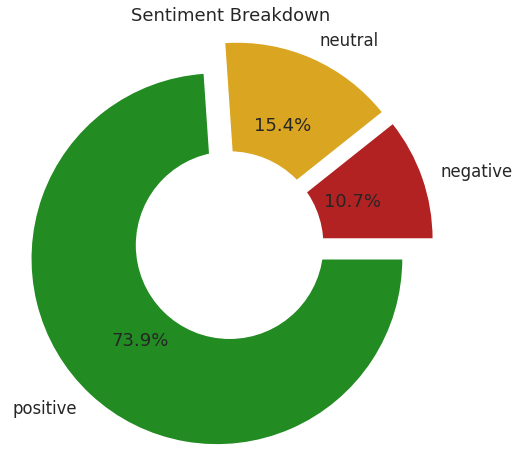

In [129]:
fig2, ax2 = plt.subplots(figsize=(8,8))

my_explode = (0.1, 0.1, 0.1)
plt.pie(by_sentiment, 
        labels=by_sentiment.index, 
        autopct='%1.1f%%', 
        shadow=False, 
        pctdistance=0.60, 
        explode=my_explode, 
        colors=my_sentiment_colors)
plt.title('Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
center_circle = plt.Circle((0,0),0.50,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

## Question 1: Insights/Recommendations
There are _many_ more Tweets with Positive sentiment than Negative and Neutral combined. Recommendation is to address this class imblance in the Text Classifier modeling step. 

## Question 2: What is the Breakdown of Tweets by a) US Geographic Regions and by b) State in each Region?

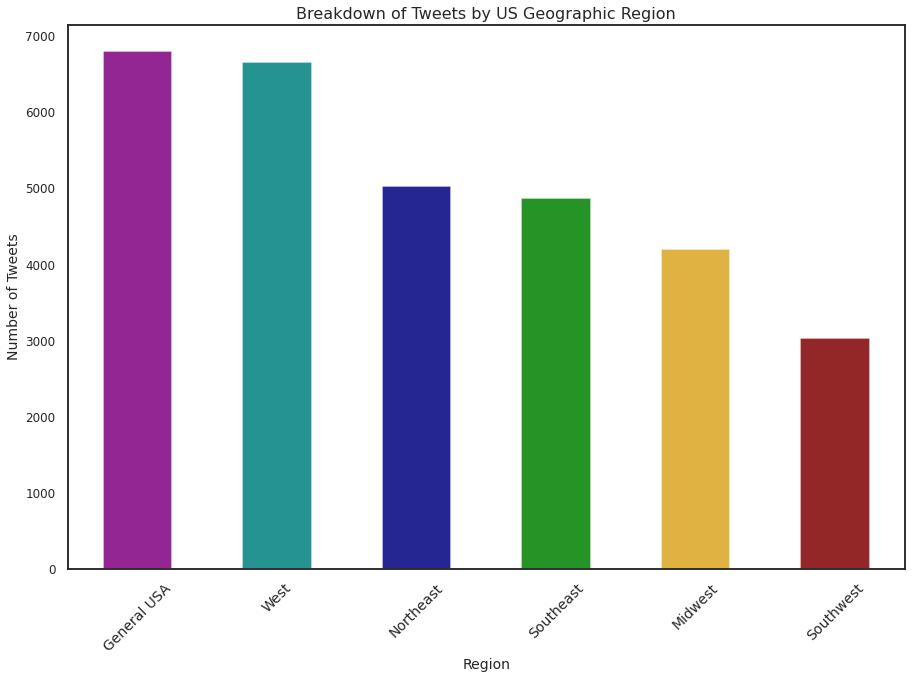

In [114]:
region_colors = ['purple', 'teal', 'navy', 'green', 'goldenrod', 'maroon']
by_region = vetted_usa_tweets.groupby(['region'])['content'].count()
by_region.sort_values(ascending=False, inplace=True)
by_region.plot.bar(fontsize=14, rot=45, alpha=0.85, figsize=(15,10), color=region_colors)
plt.title('Breakdown of Tweets by US Geographic Region', size='16')
plt.xlabel('Region',size=14)
plt.ylabel('Number of Tweets',size=14)
plt.yticks(size=12)
plt.show()

In [48]:
northeast = vetted_usa_tweets[vetted_usa_tweets['region'] == 'Northeast']
southeast = vetted_usa_tweets[vetted_usa_tweets['region'] == 'Southeast']
southwest = vetted_usa_tweets[vetted_usa_tweets['region'] == 'Southwest']
west = vetted_usa_tweets[vetted_usa_tweets['region'] == 'West']
midwest = vetted_usa_tweets[vetted_usa_tweets['region'] == 'Midwest']
general_usa = vetted_usa_tweets[vetted_usa_tweets['region'] == 'General USA']

In [89]:
west_tweet_count = west.shape[0]
ne_tweet_count = northeast.shape[0]
se_tweet_count = southeast.shape[0]
mw_tweet_count = midwest.shape[0]
sw_tweet_count = southwest.shape[0]

In [115]:
northeast_by_state = northeast.groupby(['loc_state_vetted'])['content'].count()
southeast_by_state = southeast.groupby(['loc_state_vetted'])['content'].count()
southwest_by_state = southwest.groupby(['loc_state_vetted'])['content'].count()
west_by_state = west.groupby(['loc_state_vetted'])['content'].count()
midwest_by_state = midwest.groupby(['loc_state_vetted'])['content'].count()

regions_by_state_groupbys = [('West', west_by_state, 'teal'), 
                             ('Northeast', northeast_by_state, 'navy'), 
                             ('Southeast', southeast_by_state, 'green'), 
                             ('Midwest', midwest_by_state, 'goldenrod'),
                             ('Southwest', southwest_by_state, 'maroon')]

northeast_by_state_and_sentiment = northeast.groupby(['loc_state_vetted', 'sentiment'])['content'].count()
southeast_by_state_and_sentiment = southeast.groupby(['loc_state_vetted', 'sentiment'])['content'].count()
southwest_by_state_and_sentiment = southwest.groupby(['loc_state_vetted', 'sentiment'])['content'].count()
west_by_state_and_sentiment = west.groupby(['loc_state_vetted', 'sentiment'])['content'].count()
midwest_by_state_and_sentiment = midwest.groupby(['loc_state_vetted', 'sentiment'])['content'].count()

regions_by_state_and_sentiment_groupbys = [('West', west_by_state_and_sentiment, 'teal'),
                                           ('Northeast', northeast_by_state_and_sentiment, 'navy'), 
                                           ('Southeast', southeast_by_state_and_sentiment, 'green'),
                                           ('Midwest', midwest_by_state_and_sentiment, 'goldenrod'),
                                           ('Southwest', southwest_by_state_and_sentiment, 'maroon')]


In [95]:
print('------ Region: West -------')
for items in west_by_state.iteritems(): 
    print(get_pretty_percent(items[1], west_tweet_count), 'of Tweets from ' + items[0])
print('------ Region: Northeast -------')
for items in northeast_by_state.iteritems(): 
    print(get_pretty_percent(items[1], ne_tweet_count), 'of Tweets from ' + items[0])
print('------ Region: Southeast ------')
for items in southeast_by_state.iteritems(): 
    print(get_pretty_percent(items[1], se_tweet_count), 'of Tweets from ' + items[0])
print('------ Region: Midwest -------')
for items in midwest_by_state.iteritems(): 
    print(get_pretty_percent(items[1], mw_tweet_count), 'of Tweets from ' + items[0])
print('------ Region: Southwest -------')
for items in southwest_by_state.iteritems(): 
    print(get_pretty_percent(items[1], sw_tweet_count), 'of Tweets from ' + items[0])

------ Region: West -------
69.60% of Tweets from California
9.30% of Tweets from Washington
6.40% of Tweets from Colorado
4.30% of Tweets from Oregon
4.00% of Tweets from Nevada
2.60% of Tweets from Utah
1.50% of Tweets from Hawaii
1.10% of Tweets from Idaho
0.60% of Tweets from Montana
0.50% of Tweets from Alaska
0.30% of Tweets from Wyoming
------ Region: Northeast -------
30.40% of Tweets from New York
15.20% of Tweets from District of Columbia
15.10% of Tweets from Massachusetts
12.50% of Tweets from Pennsylvania
11.90% of Tweets from Maryland
5.80% of Tweets from New Jersey
3.40% of Tweets from Connecticut
1.60% of Tweets from New Hampshire
1.60% of Tweets from Rhode Island
1.10% of Tweets from Maine
1.00% of Tweets from Vermont
0.50% of Tweets from Delaware
------ Region: Southeast ------
23.00% of Tweets from Florida
15.40% of Tweets from Virginia
15.00% of Tweets from Georgia
13.20% of Tweets from North Carolina
10.60% of Tweets from Tennessee
5.00% of Tweets from Kentucky
4.4

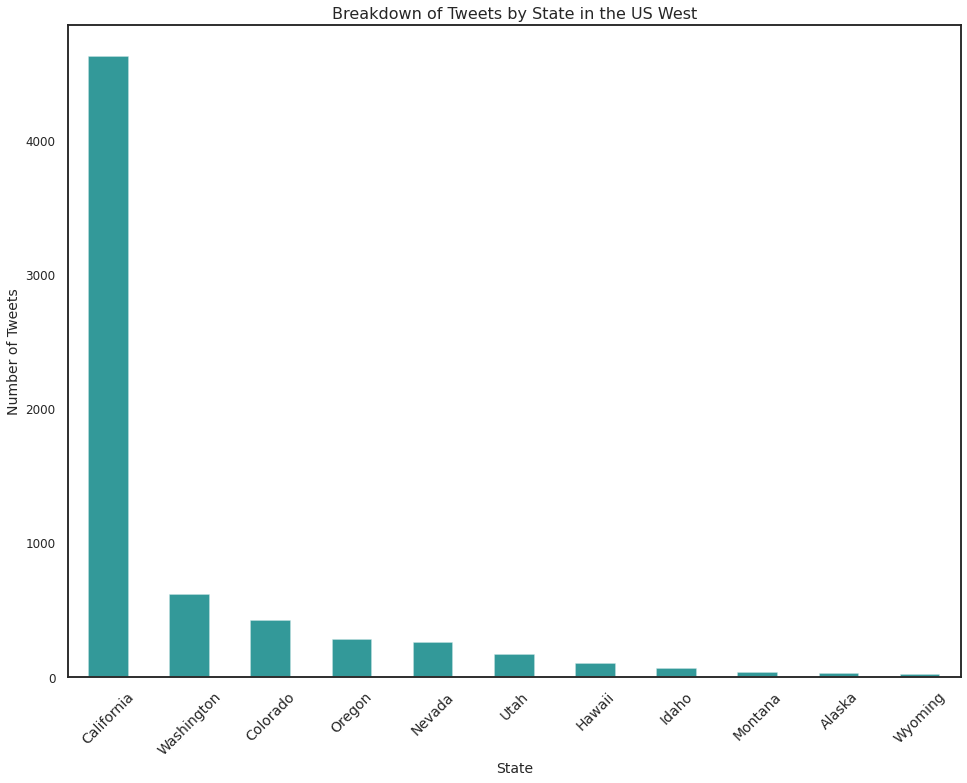

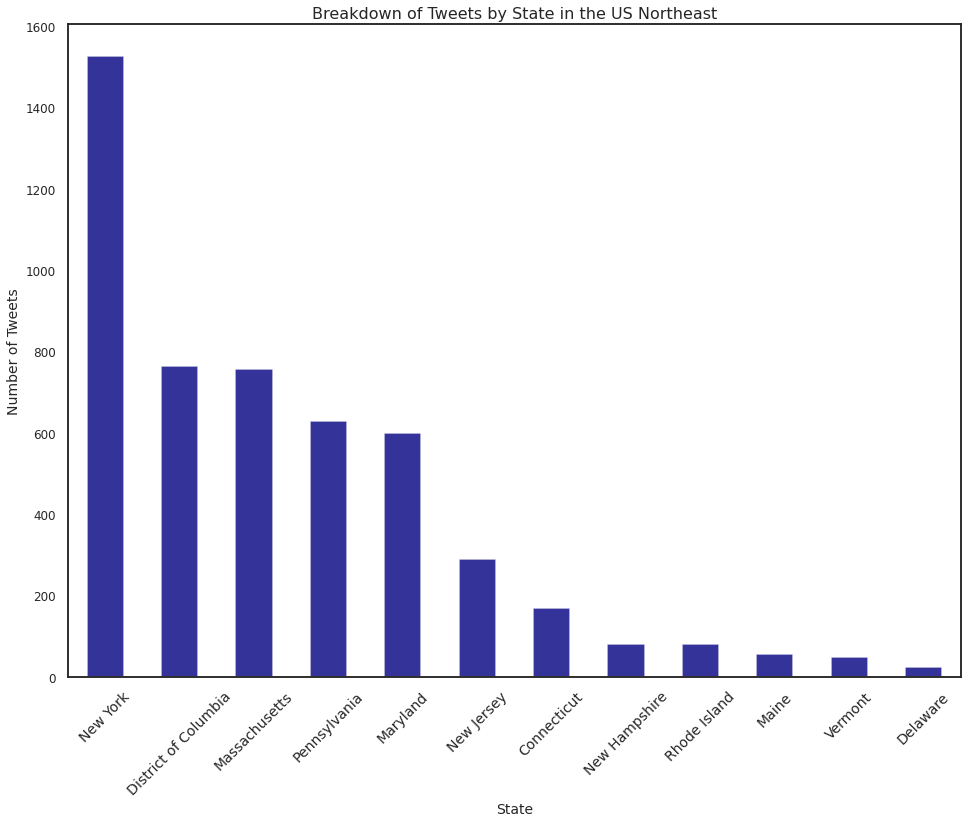

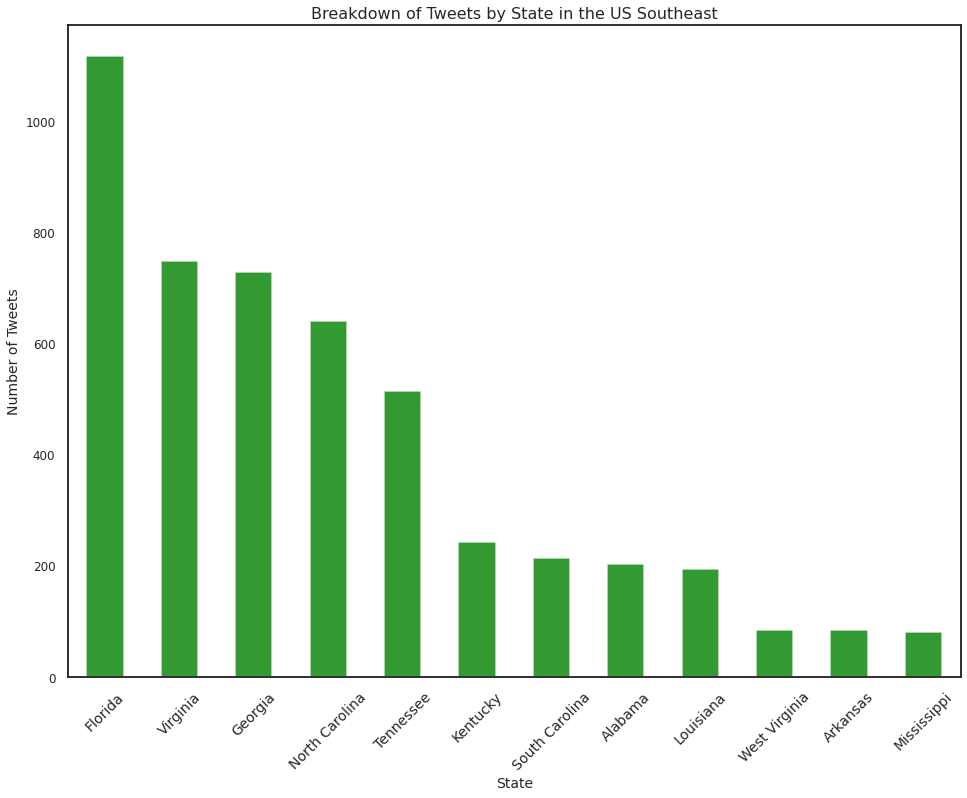

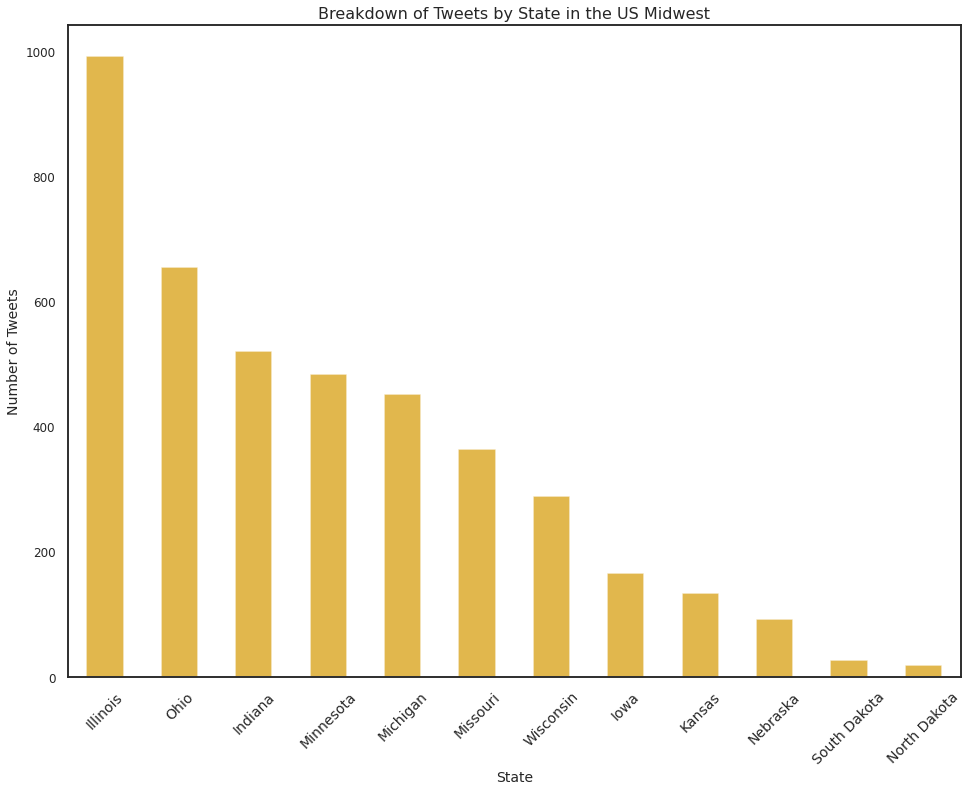

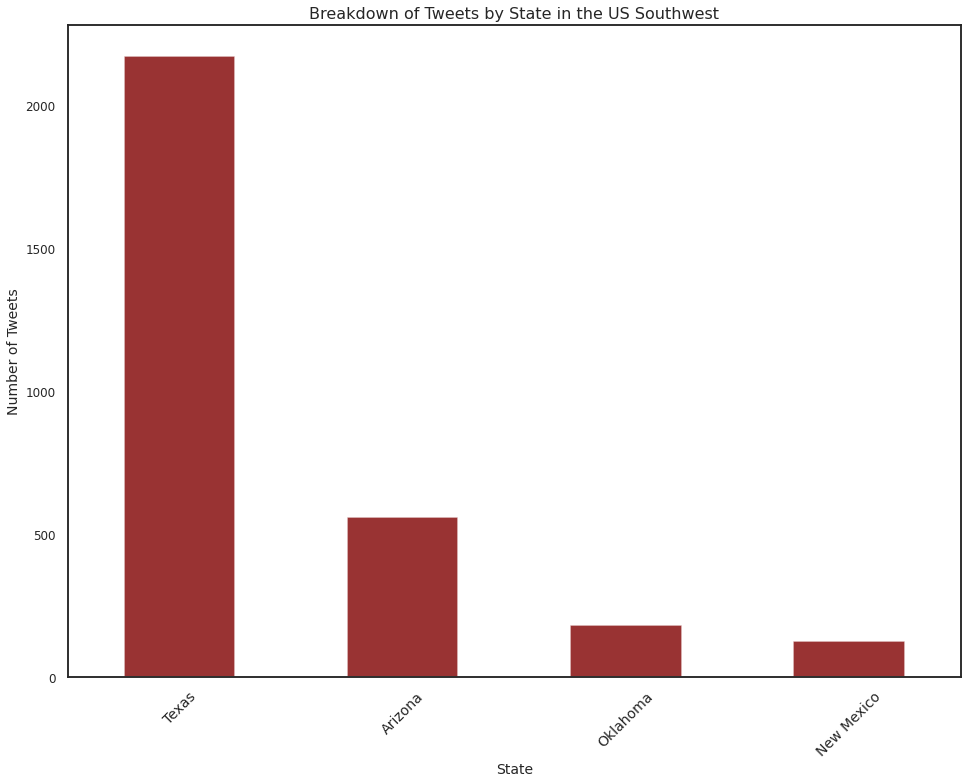

In [116]:
for item in regions_by_state_groupbys:
    plot_region_breakdown(item)

## Question 2: Insights/Recommendations:

* Tweets that included the location identifer 'USA' were binned into the 'General USA' Region. This Region has the highest number of Tweets. This is an area for Future Work in exploring if these Tweets can be assigned to the appropriate Region.

* 2 of the 5 Regions have a 'leading' State that __far__ exceeds the others in number of Tweets. The leading state in the following Regions have more than twice the number of Tweets of the 'next-in-line' State.
    * West: 
        * 69.60% of Tweets from California
        * 9.30% of Tweets from Washington
        * 6.40% of Tweets from Colorado
        * 4.30% of Tweets from Oregon
        * 4.00% of Tweets from Nevada
        * 2.60% of Tweets from Utah
        * 1.50% of Tweets from Hawaii
        * 1.10% of Tweets from Idaho
        * 0.60% of Tweets from Montana
        * 0.50% of Tweets from Alaska
        * 0.30% of Tweets from Wyoming
    * Southwest: 
         * 71.50% of Tweets from Texas
         * 18.40% of Tweets from Arizona
         * 6.00% of Tweets from Oklahoma
         * 4.10% of Tweets from New Mexico
    * Recommend that Education-focused Stakeholders take into consideration that these Regions, in particular, may be over-representing the 'leading' state. Region/State population analysis is most likely required.

* 3 of the 5 Regions had States that provided > 1% of Tweets for the Region
    * West:
        * 0.60% of Tweets from Montana
        * 0.50% of Tweets from Alaska
        * 0.30% of Tweets from Wyoming
    * Northeast:
        * 0.50% of Tweets from Delaware
    * Midwest:
        * 0.60% of Tweets from South Dakota
        * 0.50% of Tweets from North Dakota
     * Recommend that Education-focused Stakeholders take into consideration that these States, in particular, may be under-represented in the Region. State population analysis is most likely required.


## Question 3: What is the Sentiment Breakdown of Tweets by a) US Geographic Region and by b)State in each Region?

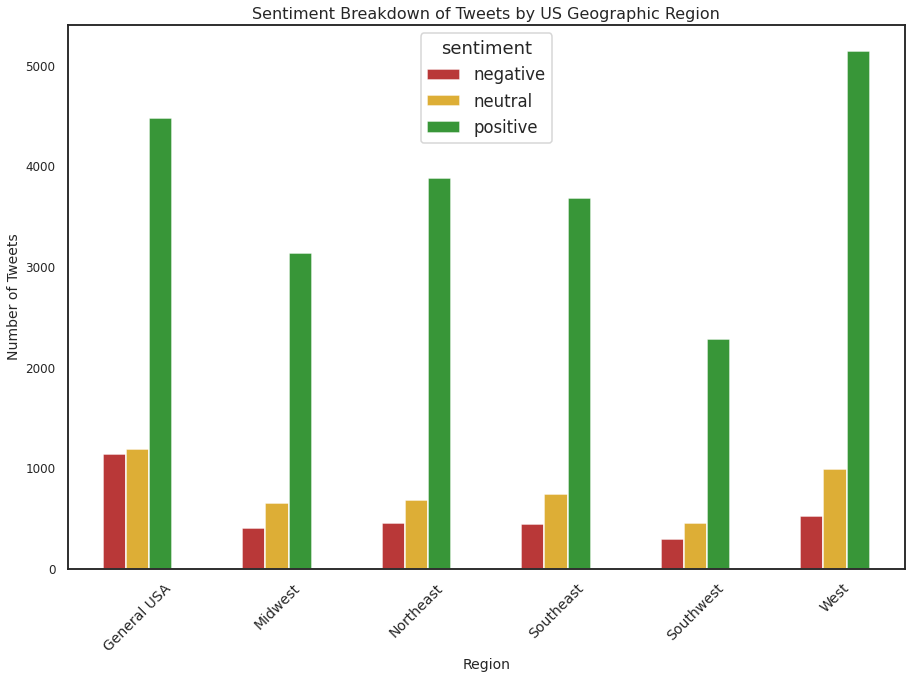

In [130]:
by_region_and_sentiment = vetted_usa_tweets.groupby(['region', 'sentiment'])['content'].count()

by_region_and_sentiment.unstack().plot.bar(fontsize=14, 
                                          rot=45, 
                                          alpha=0.90, 
                                          figsize=(15,10),
                                          color=my_sentiment_colors)
plt.title('Sentiment Breakdown of Tweets by US Geographic Region', size='16')
plt.xlabel('Region',size=14)
plt.ylabel('Number of Tweets',size=14)
plt.yticks(size=12)
plt.show()

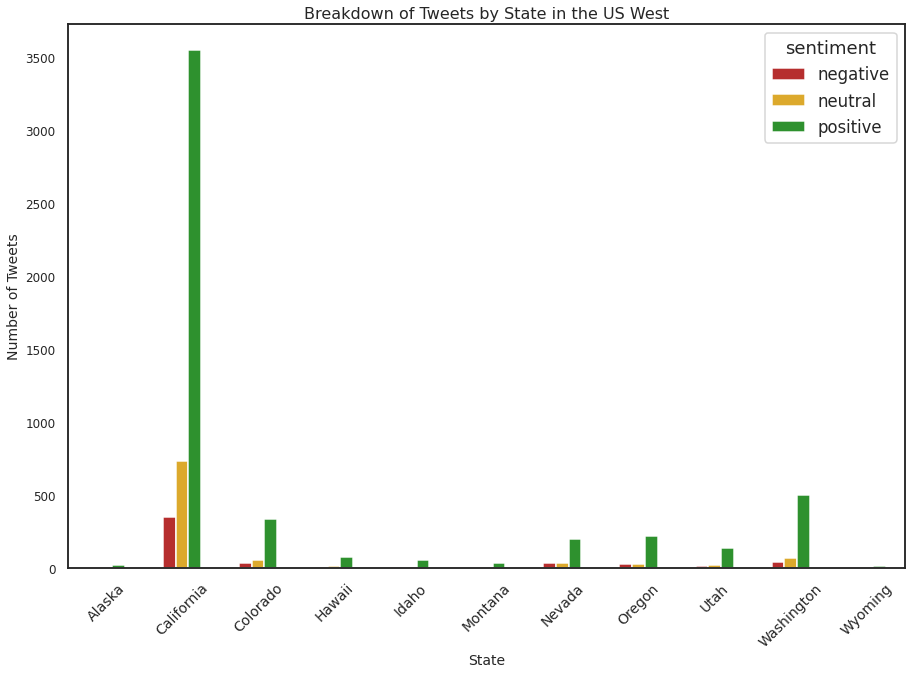

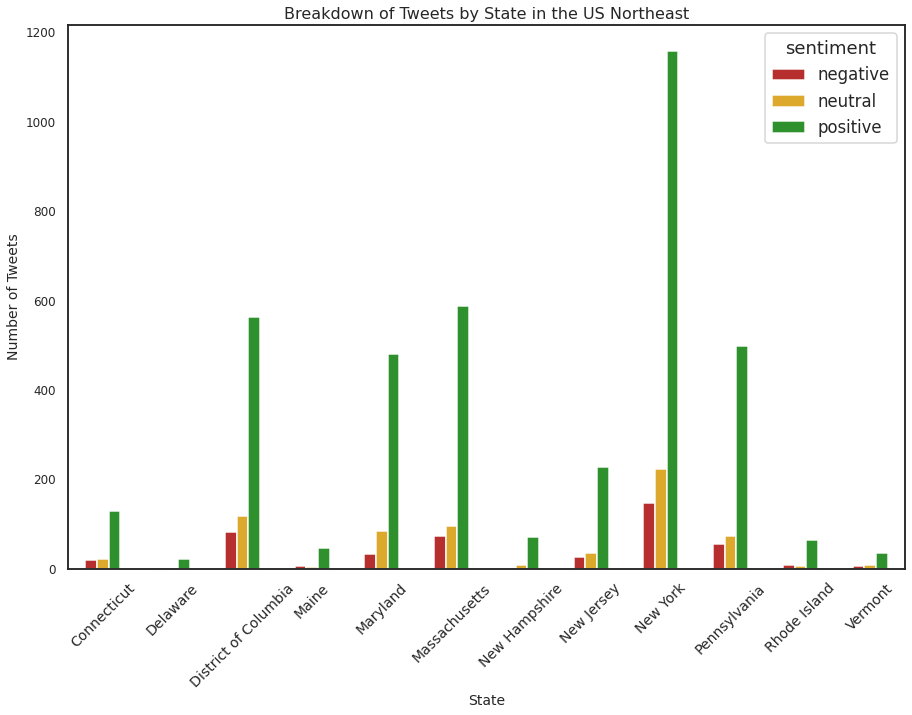

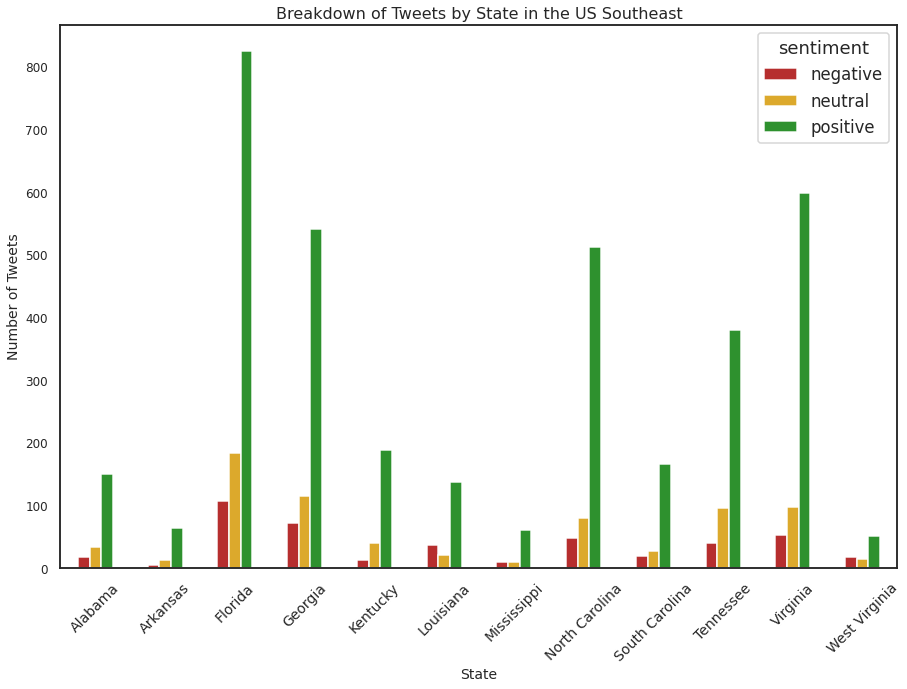

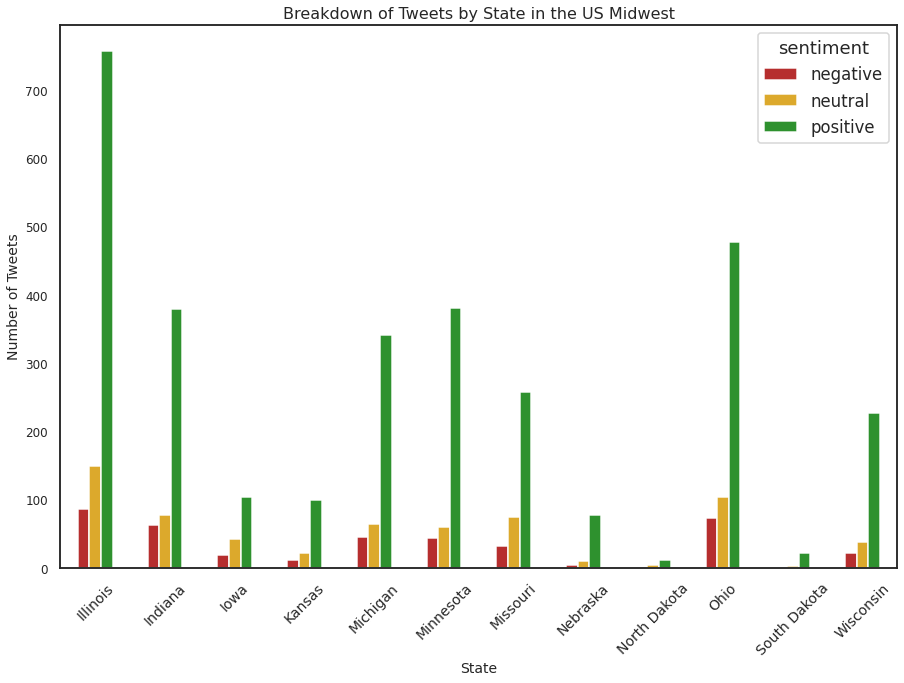

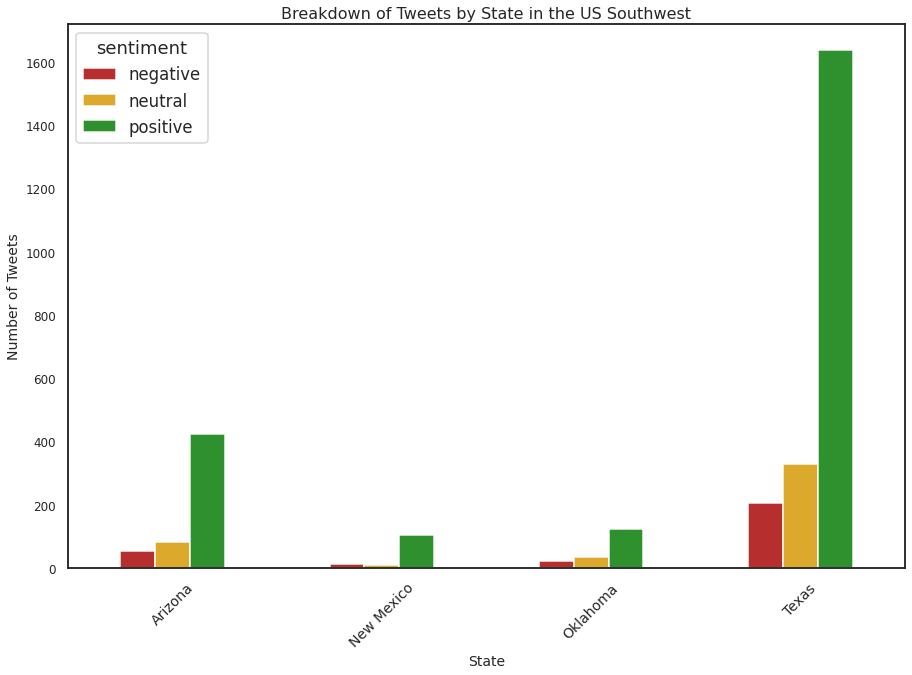

In [133]:
for item in regions_by_state_and_sentiment_groupbys:
    plot_region_breakdown(item, unstack=True)

## Question 3: Insights/Recommendations:

* The number of Positive sentiment Tweets is substainally higher than the other sentiment classes in every State, in every Region. This initial analysis suggests that Twitter is being used across the US to communicate positive information and statements on Education during COVID. I recommend that Education-focused  Stakeholders explore the Topic Modeling analysis of these Positive Tweets for additional insight.